In [1]:
# Terms: ["artificial intelligence", "AI", "machine learning"]

project = "AI_ML"

import pandas

from web_observatory import start_project
start_project(project)

Done!


In [2]:
# Get tweets about AI/ML in nature conservation (Historical focus)
from web_observatory import search_twitter
ml_nc_twitter = search_twitter(q = 'conservation "machine learning" has:links', project=project)
ai_nc_twitter = search_twitter(q = 'conservation ("artificial intellligence" OR AI) has:links', project=project)

{'query': 'conservation "machine learning" has:links', 'tweet.fields': 'created_at,entities,public_metrics', 'max_results': 100, 'start_time': '2006-03-21T00:00:00.00Z', 'end_time': '2022-01-01T00:00:00.00Z'}
Done!
{'query': 'conservation ("artificial intellligence" OR AI) has:links', 'tweet.fields': 'created_at,entities,public_metrics', 'max_results': 100, 'start_time': '2006-03-21T00:00:00.00Z', 'end_time': '2022-01-01T00:00:00.00Z'}
Done!


In [2]:
# Get Google results about AI/ML in nature conservation (Relevance)
from web_observatory import search_google
ml_nc_google = search_google(q = '"machine learning" conservation', project = project)
ai_full_nc_google = search_google(q = '"artificial intelligence" conservation', project = project)
ai_nc_google = search_google(q = 'ai nature conservation', project = project)

Done
Done
Done


In [2]:
# Compile results
from web_observatory import twitter_process 
twitter = twitter_process(project=project)
from web_observatory import google_process
google = google_process(datatype = "CSV", project=project)

In [3]:
# Extract organizations from Twitter/Google results
from web_observatory import get_domains
twitter = get_domains(twitter)
google = get_domains(google)
#twitter.groupby(by="domain").count().sort_values(by="link", ascending=False).head(20)
#google.groupby(by="domain").count().sort_values(by="link", ascending=False).head(20)

In [5]:
# Crawl organizational pages
## Set up
orgs = ["https://natureconservancy.ca/", "https://wwf.ca/", "https://davidsuzuki.org/", "https://ecotrust.ca/", "https://www.grandriver.ca/en/index.aspx", "https://raresites.org/"]
org_domains = ["natureconservancy.ca", "wwf.ca", "davidsuzuki.org", "ecotrust.ca", "grandriver.ca", "raresites.org"]
from web_observatory import initialize_crawl
initialize_crawl(sites = orgs, domains = org_domains, project = project)

In [8]:
## Crawl
#%cd digcon_crawler/digcon_crawler
!scrapy crawl digcon_crawler -O crawl_eco_gr.json --nolog # can use subprocess to make this pure python

In [2]:
## View crawl results
from web_observatory import crawl_process
crawl = crawl_process("digcon_crawler/digcon_crawler/crawl.json")
crawl.groupby(by="query").count()

,link,source
query,,
conservationgateway,2,2
davidsuzuki,6461,6461
e2rm,2,2
ecapelin,1,1
ecotrust,488,488
facebook,1,1
giftsofnature,1,1
grandriver,637,637
natureconservancy,10483,10483


In [5]:
# Process all crawl data together
from web_observatory import search_merge
pages = search_merge(twitter = twitter, google = google, crawl = crawl, project = project)
pages

,Unnamed: 0,date,link,metrics,source,query
0,0.0,2011-06-21T19:23:45.000Z,http://lowf.net/x/Ai,0.0,Twitter,"conservation (""artificial intellligence"" OR AI..."
1,1.0,2011-06-27T15:31:12.000Z,http://prevedtest.blogspot.com/2011/06/ferrari...,0.0,Twitter,"conservation (""artificial intellligence"" OR AI..."
2,2.0,2011-08-19T07:01:18.000Z,http://kwa.ai/ruveEi,1.0,Twitter,"conservation (""artificial intellligence"" OR AI..."
3,3.0,2011-08-19T08:07:12.000Z,http://kwa.ai/tkECTU,0.0,Twitter,"conservation (""artificial intellligence"" OR AI..."
4,4.0,2011-08-23T06:57:36.000Z,http://kwa.ai/OHZWHp,0.0,Twitter,"conservation (""artificial intellligence"" OR AI..."
...,...,...,...,...,...,...
1120,NaN,NaN,https://www.grandriver.ca/en/our-watershed/Riv...,NaN,Crawl,grandriver
1121,NaN,NaN,https://ecotrust.ca/team/ashli-akins/,NaN,Crawl,ecotrust
1122,NaN,NaN,https://ecotrust.ca/latest/annual-reports/2020...,NaN,Crawl,ecotrust
1123,NaN,NaN,https://ecotrust.ca/latest/blog/introducing-th...,NaN,Crawl,ecotrust


In [ ]:
# Get Twitter archives
#pages = pandas.read_csv("AI_ML/all_search_results.csv")
from web_observatory import get_versions
results = get_versions(pages, project = project)
results

In [2]:
# Scrape pages
## Initialize / De-duplicate full urls
results = pandas.read_csv(project+"/page_versions_full.csv")
from web_observatory import initialize_scrape
urls = initialize_scrape(versions = results, project = project)

/Users/enost/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Done!


In [3]:
%cd digcon_scraper/digcon_scraper/
from web_observatory import scrape
scrape(urls)

/Users/enost/Downloads/digcon_scraper/digcon_scraper


2022-05-04 12:26:43 [py.warnings] WARNING: /Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/extensions/feedexport.py:289: ScrapyDeprecationWarning: The `FEED_URI` and `FEED_FORMAT` settings have been deprecated in favor of the `FEEDS` setting. Please see the `FEEDS` setting docs for more details
  exporter = cls(crawler)



2022-05-04 12:26:53 [scrapy.core.scraper] ERROR: Error downloading <GET http://electric_supply.sharedby.co/links/3f6gzg>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
ValueError: invalid hostname: electric_supply.sharedby.co


2022-05-04 12:26:54 [scrapy.core.scraper] ERROR: Error downloading <GET http://electric_supply.sharedby.co/links/wwhmlm>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
ValueError: invalid hostname: electric_supply.sharedby.co


2022-05-04 12:26:55 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://nrc-prod.literatumonline.com/doi/abs/10.1139/cjfas-2012-0449> (failed 3 times): 503 Service Unavailable


2022-05-04 12:27:50 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://web.archive.org/web/20210417032416id_/https://news.nationalgeographic.com/news/2014/09/140922-pristine-seas-expansion-ocean-marine-conservation/> (failed 3 times): 503 Service Unavailable


2022-05-04 12:28:14 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://news.nationalgeographic.com/content/news/en_us/2015/05/150507-rhinos-without-borders-airlift-botswana-south-africa-conservation.html> (failed 3 times): 503 Service Unavailable


2022-05-04 12:30:20 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://iot-for-all.com/how-iot-is-used-to-stop-poaching-e2467ef0b9a5> (failed 3 times): 503 Service Unavailable


2022-05-04 12:31:34 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.cambridge.org/core/journals/oryx/article/fostering-adoption-of-conservation-technologies-a-case-study-with-wildlife-law-enforcement-rangers/d8a301faf5eccb2a42c6bfdeacf777de> (failed 3 times): 500 Internal Server Error


2022-05-04 12:31:46 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://joptimisemonsiteinternet.com/machine-a-broyer-spams/> (failed 3 times): Connection was refused by other side: 61: Connection refused.
2022-05-04 12:31:46 [scrapy.core.scraper] ERROR: Error downloading <GET https://joptimisemonsiteinternet.com/machine-a-broyer-spams/>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
twisted.internet.error.ConnectionRefusedError: Connection was refused by other side: 61: Connection refused.


2022-05-04 12:31:53 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/abs/10.1111/cobi.13117> (failed 3 times): 503 Service Unavailable


2022-05-04 12:32:15 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.pnas.org/doi/10.1073/pnas.1719367115> (failed 3 times): 503 Service Unavailable


2022-05-04 12:32:19 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.pnas.org/doi/pdf/10.1073/pnas.1719367115> (failed 3 times): 503 Service Unavailable


2022-05-04 12:32:44 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/full/10.1111/cobi.13117> (failed 3 times): 503 Service Unavailable


2022-05-04 12:33:06 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.lebanonews.net/en/2018/09/17/ai-to-strengthen-environmental-conservation-in-abu-dhabi/> (failed 3 times): 503 Service Unavailable


2022-05-04 12:33:09 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/10.1111/cobi.13226> (failed 3 times): 503 Service Unavailable


2022-05-04 12:33:28 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/full/10.1111/cobi.13104> (failed 3 times): 503 Service Unavailable


2022-05-04 12:33:30 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://web.archive.org/web/20181016071641id_/http://newsintweets.com/> (failed 3 times): 503 Service Unavailable


2022-05-04 12:33:38 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.pnas.org/doi/10.1073/pnas.1804098115> (failed 3 times): 503 Service Unavailable


2022-05-04 12:33:38 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://www.pubniche.com/papyrus/zg9pojoxmc4xmdczl3buyxmumtgwnda5odexnq/> (failed 3 times): 503 Service Unavailable


2022-05-04 12:33:38 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.pnas.org/doi/full/10.1073/pnas.1804098115> (failed 3 times): 503 Service Unavailable


2022-05-04 12:33:40 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.quora.com/How-can-affordable-and-reliable-AI-change-the-scene-of-wildlife-conservation/answer/Praveen-Kumar-12704> (failed 3 times): 429 Unknown Status


2022-05-04 12:33:44 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://reviews.me/facebook_post> (failed 3 times): 500 Internal Server Error


2022-05-04 12:34:20 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://journals.sagepub.com/doi/10.1177/2399654419835828> (failed 3 times): 503 Service Unavailable


2022-05-04 12:35:28 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://journals.sagepub.com/doi/abs/10.1177/1940082919873268> (failed 3 times): 503 Service Unavailable
2022-05-04 12:35:29 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://journals.sagepub.com/doi/abs/10.1177/1940082919872923> (failed 3 times): 503 Service Unavailable
2022-05-04 12:35:29 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://zslpublications.onlinelibrary.wiley.com/doi/abs/10.1002/rse2.125> (failed 3 times): 503 Service Unavailable


2022-05-04 12:35:29 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://journals.sagepub.com/doi/abs/10.1177/1940082919870054> (failed 3 times): 503 Service Unavailable


2022-05-04 12:35:32 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://journals.sagepub.com/doi/abs/10.1177/1940082919872137> (failed 3 times): 503 Service Unavailable
2022-05-04 12:35:33 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://journals.sagepub.com/doi/abs/10.1177/1940082919875446> (failed 3 times): 503 Service Unavailable


2022-05-04 12:35:34 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://journals.sagepub.com/doi/abs/10.1177/1940082919872637> (failed 3 times): 503 Service Unavailable


2022-05-04 12:35:35 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://journals.sagepub.com/doi/abs/10.1177/1940082919864267> (failed 3 times): 503 Service Unavailable


2022-05-04 12:35:35 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://journals.sagepub.com/doi/abs/10.1177/1940082919872634> (failed 3 times): 503 Service Unavailable
2022-05-04 12:35:35 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://journals.sagepub.com/doi/abs/10.1177/1940082919876072> (failed 3 times): 503 Service Unavailable


2022-05-04 12:35:37 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://journals.sagepub.com/doi/abs/10.1177/1940082919878960> (failed 3 times): 503 Service Unavailable


2022-05-04 12:35:37 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://journals.sagepub.com/doi/abs/10.1177/1940082919878827> (failed 3 times): 503 Service Unavailable
2022-05-04 12:35:37 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://journals.sagepub.com/doi/abs/10.1177/1940082919879318> (failed 3 times): 503 Service Unavailable


2022-05-04 12:35:39 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://journals.sagepub.com/doi/abs/10.1177/1940082919878961> (failed 3 times): 503 Service Unavailable


2022-05-04 12:35:42 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.linkedin.com/leap/r> (failed 3 times): 502 Bad Gateway


2022-05-04 12:35:43 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://journals.sagepub.com/doi/abs/10.1177/1940082919882885> (failed 3 times): 503 Service Unavailable


2022-05-04 12:35:50 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://ps.is.mpg.de/events/computational-ecology-and-ai-for-conservation> (failed 3 times): [<twisted.python.failure.Failure twisted.internet.error.ConnectionDone: Connection was closed cleanly.>]
2022-05-04 12:35:51 [scrapy.core.scraper] ERROR: Error downloading <GET https://ps.is.mpg.de/events/computational-ecology-and-ai-for-conservation>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
twisted.web._newclient.ResponseNeverReceived: [<twisted.python.failure.Failure twisted.internet.error.ConnectionDone: Connection was closed cleanly.>]


2022-05-04 12:35:54 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://ps.is.mpg.de/talks/computational-ecology-and-ai-for-conservation> (failed 3 times): [<twisted.python.failure.Failure twisted.internet.error.ConnectionDone: Connection was closed cleanly.>]
2022-05-04 12:35:54 [scrapy.core.scraper] ERROR: Error downloading <GET https://ps.is.mpg.de/talks/computational-ecology-and-ai-for-conservation>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
twisted.web._newclient.ResponseNeverReceived: [<twisted.python.failure.Failure twisted.internet.error.ConnectionDone: Connection was closed cleanly.>]


2022-05-04 12:35:59 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://conbio.onlinelibrary.wiley.com/doi/pdf/10.1111/cobi.13435> (failed 3 times): 503 Service Unavailable


2022-05-04 12:36:30 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://insights.globalspec.com/article/13196/watch-ai-app-aids-wildlife-conservation-efforts> (failed 3 times): 503 Service Unavailable


2022-05-04 12:36:56 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://chu.tbe.taleo.net/chu04/ats/careers/v2/viewrequisition> (failed 3 times): 500 Internal Server Error


2022-05-04 12:37:05 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://newsprofixpro.com/news204/2020/03/21/ai-analyzes-biology-studies-to-find-out-were-getting-better-at-wildlife-conservation/> (failed 3 times): 500 Internal Server Error


2022-05-04 12:37:16 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://aifortheplanet.com/flag-deforested-regions-to-help-the-amazon-rainforest/> (failed 3 times): 502 Bad Gateway


2022-05-04 12:38:19 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.isprambiente.gov.it/en/archive/ispra-events/2020/10/natural-capital-accounting-to-integrate-biodiversity-conservation-into-sustainable-development-policies> (failed 3 times): [<twisted.python.failure.Failure twisted.internet.error.ConnectionLost: Connection to the other side was lost in a non-clean fashion: Connection lost.>]
2022-05-04 12:38:19 [scrapy.core.scraper] ERROR: Error downloading <GET https://www.isprambiente.gov.it/en/archive/ispra-events/2020/10/natural-capital-accounting-to-integrate-biodiversity-conservation-into-sustainable-development-policies>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
twisted.web._newclient.ResponseNeverReceived: [<twisted.python.failure.Failure twisted.internet.error.C

2022-05-04 12:38:23 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/abs/10.1111/jfb.14589> (failed 3 times): 503 Service Unavailable


2022-05-04 12:38:25 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.amazon.ca/-/fr/foodsaver-fm5200-033-syst%c3%a8me-conservation-aliments/dp/b06xh7gtfv> (failed 3 times): 503 Service Unavailable


2022-05-04 12:38:27 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://besjournals.onlinelibrary.wiley.com/doi/10.1111/2041-210x.13501> (failed 3 times): 503 Service Unavailable


2022-05-04 12:38:36 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/10.1002/ece3.6840> (failed 3 times): 503 Service Unavailable


2022-05-04 12:38:38 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/10.1111/jfb.14589> (failed 3 times): 503 Service Unavailable


2022-05-04 12:39:16 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://zslpublications.onlinelibrary.wiley.com/doi/10.1002/rse2.195> (failed 3 times): 503 Service Unavailable


2022-05-04 12:39:22 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://onlinelibrary.wiley.com/doi/10.1002/rse2.195> (failed 3 times): 503 Service Unavailable


2022-05-04 12:39:33 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://faculty-mentors/> (failed 3 times): DNS lookup failed: no results for hostname lookup: faculty-mentors.


2022-05-04 12:39:33 [scrapy.core.scraper] ERROR: Error downloading <GET https://faculty-mentors/>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/endpoints.py", line 1020, in startConnectionAttempts
    raise error.DNSLookupErro

2022-05-04 12:39:49 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://jornades/udg4sdg/presentation/tabid/24985/language/ca-es/default.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: jornades.


2022-05-04 12:39:49 [scrapy.core.scraper] ERROR: Error downloading <GET http://jornades/udg4sdg/presentation/tabid/24985/language/ca-es/default.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/endpoints.py", line 1020, in s

2022-05-04 12:39:54 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://luvs.hi.is/vidburdir/whales_sea_turtles_ai_biological_conservation> (failed 3 times): 500 Internal Server Error


2022-05-04 12:40:34 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://besjournals.onlinelibrary.wiley.com/doi/10.1111/2041-210x.13608> (failed 3 times): 503 Service Unavailable


2022-05-04 12:40:35 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://journals.sagepub.com/doi/abs/10.1177/19400829211014740> (failed 3 times): 503 Service Unavailable


2022-05-04 12:41:28 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://zslpublications.onlinelibrary.wiley.com/doi/10.1002/rse2.200> (failed 3 times): 503 Service Unavailable


2022-05-04 12:41:50 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET http://web.archive.org/web/20220331031242id_/https://rainbowhost.co.uk/> (failed 3 times): 429 Unknown Status


2022-05-04 12:41:58 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.camerounweb.com/validate_user.php> (failed 3 times): 503 Service Unavailable


2022-05-04 12:42:28 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.cambridge.org/core/books/artificial-intelligence-and-conservation/17c33af856648b208e47a10813cec6df> (failed 3 times): 500 Internal Server Error


2022-05-04 12:42:29 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://journals.sagepub.com/doi/10.1177/19400829211014740> (failed 3 times): 503 Service Unavailable


2022-05-04 12:42:30 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://conbio.onlinelibrary.wiley.com/doi/abs/10.1111/cobi.13117> (failed 3 times): 503 Service Unavailable


2022-05-04 12:42:31 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://zslpublications.onlinelibrary.wiley.com/doi/full/10.1002/rse2.134> (failed 3 times): 503 Service Unavailable


2022-05-04 18:01:16 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://conservationbygeography/northamerica/unitedstates/edc/reportsdata/climate/coastalresilience/pages/default.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: conservationbygeography.
2022-05-04 18:01:16 [scrapy.core.scraper] ERROR: Error downloading <GET https://conservationbygeography/northamerica/unitedstates/edc/reportsdata/climate/coastalresilience/pages/default.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    

2022-05-04 20:05:10 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://conservationbygeography/northamerica/unitedstates/edc/reportsdata/terrestrial/resilience/pages/default.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: conservationbygeography.
2022-05-04 20:05:10 [scrapy.core.scraper] ERROR: Error downloading <GET https://conservationbygeography/northamerica/unitedstates/edc/reportsdata/terrestrial/resilience/pages/default.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return

2022-05-04 22:46:42 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/outdoor-recreation/visitor-safety.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:46:42 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/outdoor-recreation/visitor-safety.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 85

2022-05-04 22:46:44 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/who-we-are/accessibility.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.


2022-05-04 22:46:44 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/who-we-are/accessibility.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/endpoints.py", line 1020, in startConnectionAttempts
    raise err

2022-05-04 22:46:45 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/outdoor-recreation/park-services-and-info.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:46:45 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/outdoor-recreation/park-services-and-info.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/de

2022-05-04 22:46:45 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/index.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:46:45 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/index.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # ty

2022-05-04 22:46:46 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/our-watershed/landowner-grants-and-resources.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:46:47 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/our-watershed/landowner-grants-and-resources.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/inter

2022-05-04 22:46:47 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/who-we-are/grca-properties.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/endpoints.py", line 1020, in startConnectionAttempts
    raise e

2022-05-04 22:46:48 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/learn-get-involved/connect-with-nature-at-home.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:46:48 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/terms-of-use.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.


2022-05-04 22:46:48 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/learn-get-involved/connect-with-nature-at-home.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/endpoints.py", line 1020, in startConnection

2022-05-04 22:46:50 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/outdoor-recreation/trails.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:46:50 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/who-we-are/conservation-authorities-act-regulation-687-21.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:46:50 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/outdoor-recreation/trails.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/

2022-05-04 22:46:50 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/who-we-are/grca-partners.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:46:50 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/learn-get-involved/day-camps.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:46:50 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/who-we-are/grca-partners.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line

2022-05-04 22:46:51 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/outdoor-recreation/hunting.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.


2022-05-04 22:46:51 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/outdoor-recreation/hunting.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/endpoints.py", line 1020, in startConnectionAttempts
    raise e

2022-05-04 22:46:52 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/planning-development/planning-and-development.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:46:52 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/planning-development/planning-and-development.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/int

2022-05-04 22:46:52 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/our-watershed/heritage-river-designation.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:46:52 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/learn-get-involved/watershed-awards.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:46:52 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/our-watershed/heritage-river-designation.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scra

2022-05-04 22:46:52 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/our-watershed/low-water-response.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/endpoints.py", line 1020, in startConnectionAttempts
    r

2022-05-04 22:46:55 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/our-watershed/watershed-planning.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:46:55 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/our-watershed/watershed-planning.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857,

2022-05-04 22:46:58 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/who-we-are/grca-strategic-plan.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:46:58 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/outdoor-recreation/winter-activity-conditions.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:46:58 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/who-we-are/grca-strategic-plan.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/do

2022-05-04 22:46:58 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/who-we-are/vision-mission-values.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:46:58 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/who-we-are/vision-mission-values.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857,

2022-05-04 22:46:59 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/outdoor-recreation/geocaching.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/endpoints.py", line 1020, in startConnectionAttempts
    rais

2022-05-04 22:46:59 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/learn-get-involved/nature-centres.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:46:59 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/our-watershed/flood-warning-system.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.


2022-05-04 22:46:59 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/learn-get-involved/nature-centres.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/endpoints.py", line 1020, in startConnectionAttempts
    

2022-05-04 22:47:00 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://www.grandriver.ca/Common/error.aspx?aspxerrorpath=/modules/contact/search.aspx> (failed 3 times): 500 Internal Server Error
2022-05-04 22:47:00 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/learn-get-involved/school-programs.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:00 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/outdoor-recreation/conservation-areas.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:00 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/learn-get-involved/school-programs.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/pyt

2022-05-04 22:47:04 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/who-we-are/frequently-asked-questions-faq.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.


2022-05-04 22:47:04 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/who-we-are/frequently-asked-questions-faq.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/endpoints.py", line 1020, in startConnectionAttem

2022-05-04 22:47:05 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/outdoor-recreation/skiing-and-snowshoeing.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:05 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/who-we-are/student-jobs.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:05 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/outdoor-recreation/skiing-and-snowshoeing.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/do

2022-05-04 22:47:05 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/who-we-are/student-jobs.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/endpoints.py", line 1020, in startConnectionAttempts
    raise erro

2022-05-04 22:47:07 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/outdoor-recreation/birding.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.


2022-05-04 22:47:07 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/outdoor-recreation/birding.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/endpoints.py", line 1020, in startConnectionAttempts
    raise e

2022-05-04 22:47:08 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/who-we-are/covid-19.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:08 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/who-we-are/covid-19.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    curr

2022-05-04 22:47:10 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/outdoor-recreation/fishing.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:10 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/outdoor-recreation/fishing.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCall

2022-05-04 22:47:11 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/learn-get-involved/children_s-water-festivals.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:11 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/our-watershed/dams-and-reservoirs.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:11 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/learn-get-involved/children_s-water-festivals.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packa

2022-05-04 22:47:11 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/our-watershed/dams-and-reservoirs.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/endpoints.py", line 1020, in startConnectionAttempts
    

2022-05-04 22:47:11 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/our-watershed/river-and-stream-flows.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:11 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/our-watershed/river-and-stream-flows.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", l

2022-05-04 22:47:14 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://common/sitemap.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: common.
2022-05-04 22:47:14 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/our-watershed/maps-and-data.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:14 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/our-watershed/research.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:14 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/copyright.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:14 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/outdoor-recreation/group-facilities.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05

2022-05-04 22:47:14 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/our-watershed/maps-and-data.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/endpoints.py", line 1020, in startConnectionAttempts
    raise 

2022-05-04 22:47:14 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/our-watershed/fisheries-management.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:15 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/our-watershed/fisheries-management.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 

2022-05-04 22:47:17 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/who-we-are/freedom-of-information.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:17 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/who-we-are/freedom-of-information.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 85

2022-05-04 22:47:20 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/outdoor-recreation/boating.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:20 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/outdoor-recreation/boating.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCall

2022-05-04 22:47:21 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/who-we-are/board-meetings.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.


2022-05-04 22:47:21 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/who-we-are/board-meetings.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/endpoints.py", line 1020, in startConnectionAttempts
    raise er

2022-05-04 22:47:23 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/outdoor-recreation/outdoor-recreation.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:23 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/outdoor-recreation/outdoor-recreation.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py",

2022-05-04 22:47:27 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://subscribe> (failed 3 times): DNS lookup failed: no results for hostname lookup: subscribe.
2022-05-04 22:47:27 [scrapy.core.scraper] ERROR: Error downloading <GET https://subscribe>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # typ

2022-05-04 22:47:28 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/outdoor-recreation/park-status.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:28 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/outdoor-recreation/park-status.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in 

2022-05-04 22:47:28 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/our-watershed/water.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.


2022-05-04 22:47:29 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/our-watershed/water.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/endpoints.py", line 1020, in startConnectionAttempts
    raise error.DN

2022-05-04 22:47:29 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/outdoor-recreation/swimming.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/endpoints.py", line 1020, in startConnectionAttempts
    raise 

2022-05-04 22:47:29 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/learn-get-involved/learn-and-get-involved.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:29 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/learn-get-involved/learn-and-get-involved.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/de

2022-05-04 22:47:30 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/outdoor-recreation/park-status-and-more.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:30 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/outdoor-recreation/park-status-and-more.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.

2022-05-04 22:47:31 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/who-we-are/connect.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.


2022-05-04 22:47:31 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/who-we-are/connect.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/endpoints.py", line 1020, in startConnectionAttempts
    raise error.DNS

2022-05-04 22:47:34 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/learn-get-involved/volunteer.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:34 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/learn-get-involved/volunteer.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _run

2022-05-04 22:47:38 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/planning-development/permits.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:38 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/planning-development/permits.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _run

2022-05-04 22:47:39 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/learn-get-involved/river-safety.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:39 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/learn-get-involved/river-safety.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, i

2022-05-04 22:47:40 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://common/idliketo.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: common.


2022-05-04 22:47:40 [scrapy.core.scraper] ERROR: Error downloading <GET https://common/idliketo.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/endpoints.py", line 1020, in startConnectionAttempts
    raise error.DNSLookup

2022-05-04 22:47:42 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/who-we-are/job-opportunities.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:42 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/who-we-are/job-opportunities.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _run

2022-05-04 22:47:43 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/who-we-are/grca-history.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.


2022-05-04 22:47:43 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/who-we-are/grca-history.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/endpoints.py", line 1020, in startConnectionAttempts
    raise erro

2022-05-04 22:47:45 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/who-we-are/who-we-are.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:45 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/who-we-are/who-we-are.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    

2022-05-04 22:47:48 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/outdoor-recreation/snowmobiling.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:48 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/outdoor-recreation/snowmobiling.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, i

2022-05-04 22:47:51 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/our-watershed/river-data.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:51 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/our-watershed/river-data.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallback

2022-05-04 22:47:55 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/who-we-are/grca-board-and-administration.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.


2022-05-04 22:47:55 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/who-we-are/grca-board-and-administration.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/endpoints.py", line 1020, in startConnectionAttemp

2022-05-04 22:47:55 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/planning-development/map-your-property.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:55 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/privacy.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:55 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/planning-development/apply-for-a-permit.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:55 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/planning-development/map-your-property.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twi

2022-05-04 22:47:55 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/privacy.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/endpoints.py", line 1020, in startConnectionAttempts
    raise error.DNSLookupError

2022-05-04 22:47:56 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/our-watershed/forests-and-trees.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:56 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/our-watershed/forests-and-trees.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, i

2022-05-04 22:47:57 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/outdoor-recreation/keep-our-conservation-areas-beautiful.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:47:57 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/outdoor-recreation/tubing.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.


2022-05-04 22:47:57 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/outdoor-recreation/keep-our-conservation-areas-beautiful.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/endpoints.py", line 1020, in start

2022-05-04 22:48:03 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/who-we-are/covid-19-faq.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.


2022-05-04 22:48:03 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/who-we-are/covid-19-faq.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/endpoints.py", line 1020, in startConnectionAttempts
    raise erro

2022-05-04 22:48:04 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/our-watershed/our-watershed.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.


2022-05-04 22:48:04 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/who-we-are/service-disruptions.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:48:04 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/our-watershed/our-watershed.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _ru

2022-05-04 22:48:05 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/planning-development/planning-act-review.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:48:05 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/planning-development/planning-act-review.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defe

2022-05-04 22:48:06 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/grand-river-parks.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:48:06 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://modules/news/search.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: modules.


2022-05-04 22:48:07 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/grand-river-parks.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 857, in _runCallbacks
    current.result = callback(  # type: ignore[misc]
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/endpoints.py", line 1020, in startConnectionAttempts
    raise error.DNSL

2022-05-04 22:48:07 [scrapy.downloadermiddlewares.retry] ERROR: Gave up retrying <GET https://en/planning-development/contact-a-planner.aspx> (failed 3 times): DNS lookup failed: no results for hostname lookup: en.
2022-05-04 22:48:07 [scrapy.core.scraper] ERROR: Error downloading <GET https://en/planning-development/contact-a-planner.aspx>
Traceback (most recent call last):
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py", line 1656, in _inlineCallbacks
    result = current_context.run(
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/python/failure.py", line 489, in throwExceptionIntoGenerator
    return g.throw(self.type, self.value, self.tb)
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/scrapy/core/downloader/middleware.py", line 49, in process_request
    return (yield download_func(request=request, spider=spider))
  File "/Users/enost/opt/anaconda3/lib/python3.9/site-packages/twisted/internet/defer.py

In [5]:
%cd ..

/Users/enost/Downloads


In [1]:
# Quality control
from web_observatory import query
## Create a copy of the text table
query("copy") # Only need to do this once!
## Remove from db where there was no text scraped
query("filter_empty")
## Remove anything without at least 1 keyword?
queryterms = ["artificial intelligence", "machine learning", "nature ", "conservation "] # spaces to avoid certain spam...
## Need to remove French-language sites?

query("filter_words", terms = queryterms)

Done!
Done!


In [4]:
## Get word counts
from web_observatory import query
tech_terms = ["artificial intelligence", " ai ", "machine learning", "algorithm"] # Spaces in ai to capture its use as in AI rather than e.g. said
cons_terms = ["conservation", "nature"]
#grammar = ["is", "will"] # for phrases
topics = ["forest", "mountain", "wetland", "boreal", "ocean", "river", "arctic"]
ethics = ["privacy", "surveillance", "cost"]
tools = ["market", "decision making", "working land", "indigenous-led", "easement"]
combined_terms = tech_terms + cons_terms + topics + ethics + tools

words = query("get_words", combined_terms)
words

,url,domain,source,date,artificial intelligence,ai,machine learning,algorithm,conservation,nature,...,river,arctic,privacy,surveillance,cost,market,decision making,working land,indigenous-led,easement
0,http://web.archive.org/web/20140731104236id_/h...,chesterfieldpost,Twitter,2011-36,0,0,0,0,4,0,...,4,0,1,0,3,1,0,0,0,0
1,https://etienne34-blog.tumblr.com/post/1664008...,tumblr,Twitter,2012-04,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,http://web.archive.org/web/20110828190407id_/h...,harriscompanyrec,Twitter,2011-36,0,1,0,0,0,2,...,0,0,0,0,0,3,0,0,0,1
3,http://web.archive.org/web/20210416114353id_/h...,lecuisinomane,Twitter,2018-49,0,1,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
4,https://wwf.ca/stories/good-news-bad-news-rhinos/,wwf,Crawl,None,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24674,https://www.natureconservancy.ca/fr/nous-trouv...,natureconservancy,Crawl,None,0,0,0,0,8,7,...,0,0,0,0,0,0,0,0,0,0
24675,https://wwf.ca/fr/communiques-de-presse/la-per...,wwf,Crawl,None,0,0,0,0,10,7,...,1,0,0,0,0,0,0,0,0,0
24676,https://wwf.ca/stories/tag/great-canadian-shor...,wwf,Crawl,None,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
24677,https://fundraisers.wwf.ca/fundraisers/expertp...,wwf,Crawl,None,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


In [1]:
import pandas
words = pandas.read_csv("AI_ML/words_counts.csv")
words

,Unnamed: 0,url,domain,source,date,artificial intelligence,ai,machine learning,conservation,nature,forest,mountain,wetland,boreal,ocean,river,privacy,surveillance
0,0,http://web.archive.org/web/20140731104236id_/h...,chesterfieldpost,Twitter,2011-36,0,0,0,4,0,0,0,0,0,0,4,1,0
1,1,https://etienne34-blog.tumblr.com/post/1664008...,tumblr,Twitter,2012-04,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,http://web.archive.org/web/20110828190407id_/h...,harriscompanyrec,Twitter,2011-36,0,1,0,0,2,0,0,0,0,0,0,0,0
3,3,https://www.freelancer.com/projects/machine-le...,freelancer,Twitter,2012-16,0,0,2,6,0,0,0,0,0,0,0,0,0
4,4,http://web.archive.org/web/20120901133326id_/h...,twocircles,Twitter,2012-31,0,0,0,2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24674,24674,https://www.natureconservancy.ca/fr/nous-trouv...,natureconservancy,Crawl,NaN,0,0,0,8,7,1,0,0,0,0,0,0,0
24675,24675,https://wwf.ca/fr/communiques-de-presse/la-per...,wwf,Crawl,NaN,0,0,0,10,7,0,0,0,0,0,1,0,0
24676,24676,https://wwf.ca/stories/tag/great-canadian-shor...,wwf,Crawl,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0
24677,24677,https://fundraisers.wwf.ca/fundraisers/expertp...,wwf,Crawl,NaN,0,0,0,0,3,0,0,0,0,0,0,0,0


/Users/enost/Downloads/observatory_dev_v02.py:1145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts['date'].update(counts['date'].str.slice(0,4)) # Get the year
/Users/enost/Downloads/observatory_dev_v02.py:1146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  counts['date'].update(pandas.to_datetime(counts["date"], format="%Y").dt.to_period("Y")) # Convert specific year/weeks to years #counts['date'].dt.to_timestamp('Y').dt.strftime("%Y-%m-%dT%H:%M:%S.%fZ") #


<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

<AxesSubplot:xlabel='date'>

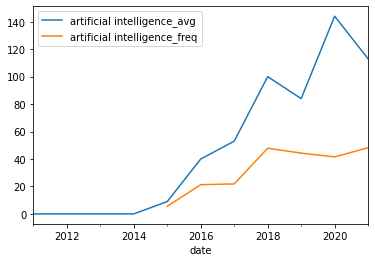

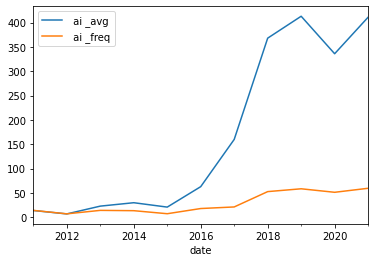

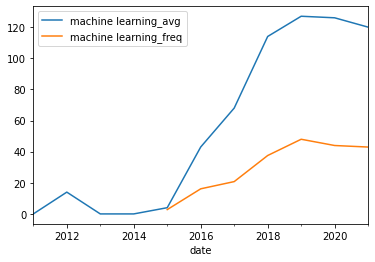

In [3]:
# Analyze
## How has the conversation about AI/ML changed over time? (Twitter frequency/average)
from web_observatory import analyze_twitter
avg, freq, total = analyze_twitter(words, terms = ["artificial intelligence", " ai ", "machine learning"])
## Where the term conservation is used
#, freq, total = analyze_twitter(words.loc[words['nature']>0], ["artificial intelligence", "machine learning"])

In [4]:
## Are certain organizations (and organization sizes) more likely to mention AI/ML? (Crawl)
from web_observatory import analyze_orgs
avg, freq = analyze_orgs(words, orgs = ["raresites", "davidsuzuki", "grandriver", "wwf", "ecotrust", "natureconservancy"], terms = ["artificial intelligence", "forest", "machine learning"])
## Are certain organizations more likely to mention ethics terms in conjunction with AI/ML? (Crawl)
avg, freq = analyze_orgs(words.loc[(words["artificial intelligence"]>0) | (words[" ai "]>0) | (words["machine learning"]>0)], orgs = ["raresites", "davidsuzuki", "grandriver", "wwf", "ecotrust", "natureconservancy"], terms = ["privacy", "surveillance"])
avg

/Users/enost/Downloads/observatory_dev_v02.py:1213: RuntimeWarning: invalid value encountered in long_scalars
  average = round((df[t].sum() / df[t].count()) * 100, 2)
/Users/enost/Downloads/observatory_dev_v02.py:1220: RuntimeWarning: invalid value encountered in long_scalars
  f = round(( m / df[t].count() ) * 100, 2)


,privacy_avg,surveillance_avg
raresites,NaN,NaN
davidsuzuki,0.0,0.0
grandriver,NaN,NaN
wwf,7.89,7.89
ecotrust,0.0,0.0
natureconservancy,0.0,0.0


 ai  easement
Zeros: 23246, 94%
easement but not  ai : 56, 0%
 ai  but not easement: 1357, 5%
Together: 20, 0%




,ai,easement
ai,1.0000,-0.4118
easement,-0.4118,1.0000


<AxesSubplot:xlabel=' ai ', ylabel='easement'>

easement  ai 
Zeros: 23246, 94%
 ai  but not easement: 1357, 5%
easement but not  ai : 56, 0%
Together: 20, 0%




,easement,ai
easement,1.0000,-0.4118
ai,-0.4118,1.0000


<AxesSubplot:xlabel='easement', ylabel=' ai '>

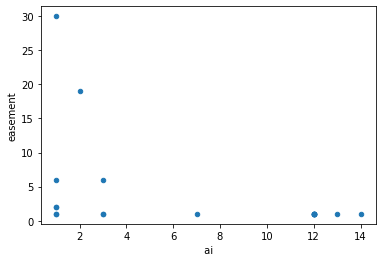

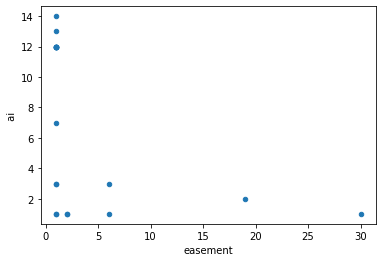

In [10]:
## Are certain topics associated with other (e.g. forest and AI vs mountain and AI?) (Twitter, Google, and Crawl)
from web_observatory import analyze_term_correlations
#analyze_term_correlations(words, ["artificial intelligence", "river", " ai "])
analyze_term_correlations(words, [" ai ", "easement"])